In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [4]:
data=pd.read_csv('C:/Users/yashas j/Documents/AIML_Lab_Dataset/AIML_Lab_Dataset/pgm3/student.csv')
print(data.shape)
data.head()


(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


C:\Users\yashas j\AppData\Local\Temp\ipykernel_17540\3063161835.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


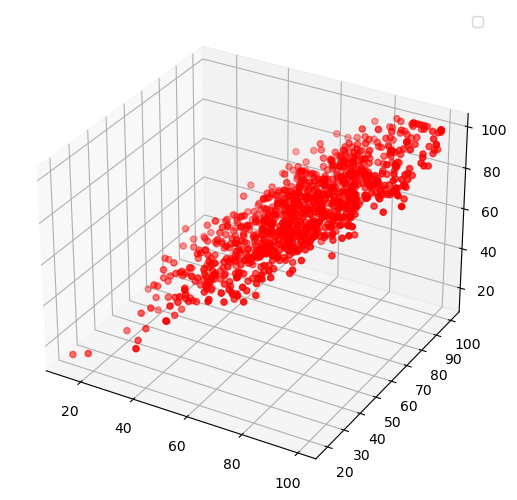

In [5]:
math=data['Math'].values
read=data['Reading'].values
write=data['Writing'].values

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(math,read,write,c='red')
plt.legend()
plt.show()

In [8]:
m=len(math)
x0=np.ones(m)
X=np.array([x0,math,read]).T

In [19]:
B=np.array([0,0,0])
Y=np.array(write)
alpha=0.0001
def cost_function(X,Y,B):
    m=len(Y)
    J=np.sum((X.dot(B)-Y)**2)/(2*m)
    return J
initial_cost=cost_function(X,Y,B)
print("Initial cost")
print(initial_cost)

def gradient_descent(X,Y,B,alpha,iterations):
    cost_history=[0]*iterations
    m=len(Y)
    for iteration in range(iterations):
        h=X.dot(B)
        loss=h-Y
        gradient = X.T.dot(loss)/m
        B=B-alpha*gradient
        cost=cost_function(X,Y,B)
        cost_history[iteration]=cost
    return B,cost_history
new_B,cost_history=gradient_descent(X,Y,B,alpha,100000)

print("new coeffitent")
print(new_B)

print("final cost")
print(cost_history[-1])

Initial cost
2470.11
new coeffitent
[-0.47889172  0.09137252  0.90144884]
final cost
10.475123473539167


In [20]:
def r2_score(Y,Y_pred):
    mean_y=np.mean(Y)
    tss=sum((Y-mean_y)**2)
    rss=sum((Y-Y_pred)**2)
    r2=1-(rss/tss)
    return r2
Y_pred=X.dot(new_B)
print("R2 score")
print(r2_score(Y,Y_pred))


R2 score
0.9097223273061553
